In [1]:
import numpy as np
import pandas as pd
import joblib

In [2]:
data = np.load("genre_matrix_full.npy")

In [3]:
from sklearn.decomposition import PCA

# Initialize PCA with 15 components
pca = PCA(n_components=10)

# Fit and transform the data
data = pca.fit_transform(data)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print(f"Total explained variance ratio with 10 components: {cumulative_variance_ratio[-1]:.3f}")


Total explained variance ratio with 10 components: 0.849


In [4]:
from sklearn.cluster import KMeans

# Initialize KMeans with 20 clusters
kmeans = KMeans(n_clusters=300, random_state=42)

# Fit the model and get cluster labels
cluster_labels = kmeans.fit_predict(data)

print(f"Number of samples in each cluster:")
for i in range(300):
    print(f"Cluster {i}: {np.sum(cluster_labels == i)}")


Number of samples in each cluster:
Cluster 0: 442
Cluster 1: 7694
Cluster 2: 2416
Cluster 3: 7984
Cluster 4: 666
Cluster 5: 12042
Cluster 6: 3252
Cluster 7: 2952
Cluster 8: 1141
Cluster 9: 1223
Cluster 10: 1206
Cluster 11: 88
Cluster 12: 2248
Cluster 13: 1354
Cluster 14: 1317
Cluster 15: 1378
Cluster 16: 477
Cluster 17: 171
Cluster 18: 262
Cluster 19: 723
Cluster 20: 906
Cluster 21: 681
Cluster 22: 512
Cluster 23: 915
Cluster 24: 544
Cluster 25: 361
Cluster 26: 187
Cluster 27: 160
Cluster 28: 333
Cluster 29: 647
Cluster 30: 245
Cluster 31: 395
Cluster 32: 333
Cluster 33: 200
Cluster 34: 278
Cluster 35: 438
Cluster 36: 90
Cluster 37: 8
Cluster 38: 204
Cluster 39: 24
Cluster 40: 228
Cluster 41: 194
Cluster 42: 115
Cluster 43: 191
Cluster 44: 294
Cluster 45: 54
Cluster 46: 295
Cluster 47: 399
Cluster 48: 127
Cluster 49: 34
Cluster 50: 164
Cluster 51: 30
Cluster 52: 40
Cluster 53: 41
Cluster 54: 152
Cluster 55: 328
Cluster 56: 40
Cluster 57: 137
Cluster 58: 111
Cluster 59: 71
Cluster 60: 1

In [5]:
joblib.dump(kmeans, 'data/movies_kmeans.pkl')

['data/movies_kmeans.pkl']

In [ ]:
cluster_labels_dict = {}
inertias = {}
silhouette_scores = {}

In [21]:
from sklearn.cluster import KMeans
# Try different numbers of clusters
n_clusters_range = range(410, 621, 30)


from sklearn.metrics import silhouette_score

for n_clusters in n_clusters_range:
    
    print(f"Clustering with {n_clusters} clusters")
    # Perform K-means clustering
    clustering = KMeans(
        n_clusters=n_clusters,  # Number of clusters to form
        random_state=42  # For reproducibility
    )
    
    # Fit the clustering model and get cluster labels
    cluster_labels = clustering.fit_predict(data)
    cluster_labels_dict[n_clusters] = cluster_labels
    
    # Calculate and store inertia
    inertias[n_clusters] = clustering.inertia_
    
    # Calculate and store silhouette score
    silhouette_scores[n_clusters] = silhouette_score(data, cluster_labels)

# Return the last cluster labels for compatibility with existing code
cluster_labels = cluster_labels_dict[n_clusters]
cluster_labels

Clustering with 410 clusters
Clustering with 440 clusters
Clustering with 470 clusters
Clustering with 500 clusters
Clustering with 530 clusters
Clustering with 560 clusters
Clustering with 590 clusters
Clustering with 620 clusters


array([185,  20,   8, ...,   3,  55,   3], shape=(83239,), dtype=int32)

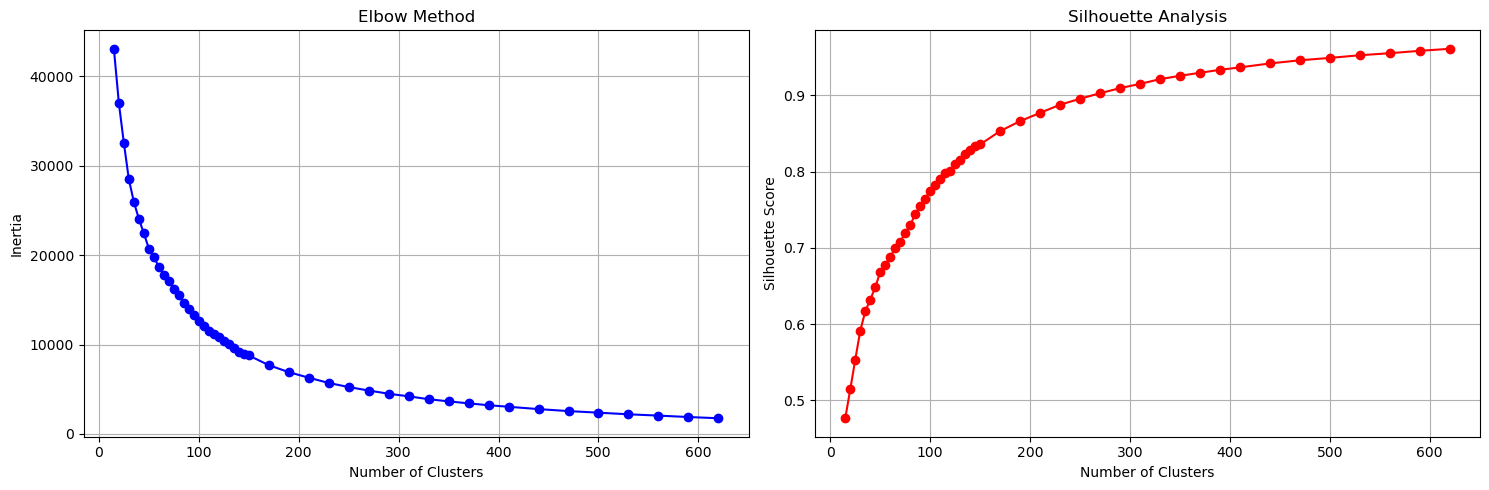

In [22]:
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot inertia
ax1.plot(list(inertias.keys()), list(inertias.values()), 'bo-')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method')
ax1.grid(True)

# Plot silhouette scores
ax2.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), 'ro-')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Analysis')
ax2.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Create a DataFrame with clustering metrics
metrics_df = pd.DataFrame({
    'n_clusters': list(inertias.keys()),
    'inertia': list(inertias.values()),
    'silhouette_score': list(silhouette_scores.values())
})

In [25]:
metrics_df.to_csv("data/metrics_clustering.csv", index=False)